# Hello World

## Making movies of the Sun! 

### By: Crisel Suarez

### The Sun ☀️

- Closest star
- 8 minutes to reach Earth 


<img src=https://solarsystem.nasa.gov/system/basic_html_elements/11561_Sun.png width="100">

<img src=https://geographical.co.uk/media/k2/items/cache/8e4e30c8fc08507de1b0b5afc7d32a85_XL.jpg width="300">



- Intresting phenomena all around the Sun

<img src=https://www.primalucelab.com/wp/en/wp-content/uploads/sites/2/2013/06/Sun.jpg width="500">

<img src=https://www.researchgate.net/profile/William-Pesnell/publication/306056942/figure/fig8/AS:397919225171976@1471882744697/The-wavelengths-measured-by-the-two-imaging-instruments-on-SDO-The-passbands-of-the-AIA.png width="400">


## Solar Dynamic Observatory/Atmospheric Imaging Assembly

- 12 seconds 
- 1.5 terabytes of data a day!!! 


<img src=https://sdo.gsfc.nasa.gov/assets/img/site/AIA.jpg width="300">
<img src=https://upload.wikimedia.org/wikipedia/commons/c/c6/Solar_Dynamics_Observatory_1.jpg width="300">

[Images taken by AIA ](https://www.nasa.gov/mission_pages/sdo/images/index.html)



# How to analyze so much data!!! 

![Superman_python](https://miro.medium.com/max/1400/1*9g3Sfrc9OpbkJaVncYWROQ.jpeg)



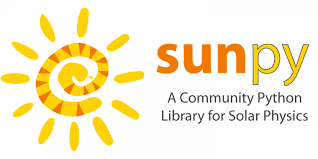 

[Sunpy](https://duygukeskek.github.io/sunpy-website/)

# + aiapy + matplotlib

## Sunpy Maps

https://docs.sunpy.org/en/stable/generated/gallery/index.html

## Tutorial 

In [62]:
## IMPORTS!

#!pip3 install sunpy
#!pip3 install matplotlib ==3.2.0


import sunpy
import sunpy.map
from sunpy.net import Fido, attrs as a
from sunpy.map.maputils import all_coordinates_from_map

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import colors
import matplotlib.ticker as ticker

import numpy as np
import glob
import pandas as pd

from astropy.coordinates import SkyCoord
import astropy.units as u


print('Sunpy version ' , sunpy.__version__)
print('Matplotlib version ' , matplotlib.__version__)


Sunpy version  2.1.0
Matplotlib version  3.2.0


## Downloading the data

In [63]:
results = Fido.search(a.Time('2013/10/28 01:00:00', '2013/10/28 04:00:00'), a.Instrument('aia'),  a.Wavelength(94*u.angstrom), a.vso.Sample(20*u.minute))  

#Saving your images locally 
downloaded_files = Fido.fetch(results, path='./Test_AIA_Images/{file}')  



Files Downloaded:   0%|          | 0/9 [00:00<?, ?file/s]

aia_lev1_94a_2013_10_28t01_20_01_12z_image_lev1.fits:   0%|          | 0.00/7.18M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t01_40_01_12z_image_lev1.fits:   0%|          | 0.00/7.19M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t02_20_01_12z_image_lev1.fits:   0%|          | 0.00/7.27M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t01_00_01_12z_image_lev1.fits:   0%|          | 0.00/7.18M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t02_00_01_12z_image_lev1.fits:   0%|          | 0.00/7.27M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t03_40_01_12z_image_lev1.fits:   0%|          | 0.00/7.17M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t03_00_01_12z_image_lev1.fits:   0%|          | 0.00/7.19M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t02_40_01_12z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

aia_lev1_94a_2013_10_28t03_20_01_12z_image_lev1.fits:   0%|          | 0.00/7.18M [00:00<?, ?B/s]

## Reading the data

In [64]:
fit_files = glob.glob('./Test_AIA_Images/*.fits')
fit_files = sorted(fit_files)
fit_files

['./Test_AIA_Images/aia_lev1_94a_2013_10_28t01_00_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t01_20_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t01_40_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t02_00_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t02_20_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t02_40_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t03_00_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t03_20_01_12z_image_lev1.fits',
 './Test_AIA_Images/aia_lev1_94a_2013_10_28t03_40_01_12z_image_lev1.fits']

In [65]:
map_fits = sunpy.map.Map(fit_files)
map_fits

 SunPy Map
 ---------
 Observatory:		 SDO
 Instrument:		 AIA 4
 Detector:		 AIA
 Measurement:		 94.0 Angstrom
 Wavelength:		 94.0 Angstrom
 Observation Date:	 2013-10-28 01:00:01
 Exposure Time:		 2.900829 s
 Dimension:		 [4096. 4096.] pix
 Coordinate System:	 helioprojective
 Scale:			 [0.600109 0.600109] arcsec / pix
 Reference Pixel:	 [2059.47998  2037.689941] pix
 Reference Coord:	 [0. 0.] arcsec                   
 array([[ 0, -1, -1, ...,  0,  0,  0],
        [ 1, -1,  0, ...,  1,  1,  1],
        [ 0,  1,  0, ...,  0,  1,  1],
        ...,
        [ 0,  0, -1, ..., -1,  2, -2],
        [-3,  2,  1, ..., -2,  3, -1],
        [ 2,  0, -1, ..., -1, -1,  0]], dtype=int16),
 SunPy Map
 ---------
 Observatory:		 SDO
 Instrument:		 AIA 4
 Detector:		 AIA
 Measurement:		 94.0 Angstrom
 Wavelength:		 94.0 Angstrom
 Observation Date:	 2013-10-28 01:20:01
 Exposure Time:		 2.900836 s
 Dimension:		 [4096. 4096.] pix
 Coordinate System:	 helioprojective
 Scale:			 [0.600109 0.600109] arcsec 

Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,94.0 Angstrom
Wavelength,94.0 Angstrom
Observation Date,2013-10-28 01:00:01
Exposure Time,2.900829 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600109 0.600109] arcsec / pix
Reference Pixel,[2059.47998 2037.689941] pix

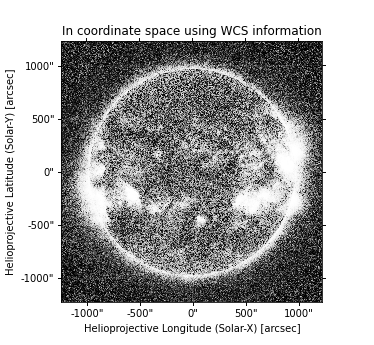
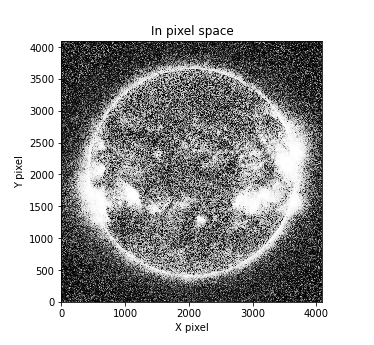
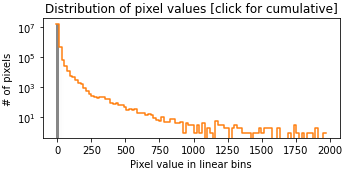
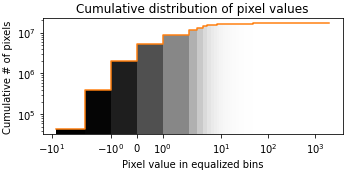

In [66]:
map_fits[0]

In [67]:
map_fits[0].data

array([[ 0, -1, -1, ...,  0,  0,  0],
       [ 1, -1,  0, ...,  1,  1,  1],
       [ 0,  1,  0, ...,  0,  1,  1],
       ...,
       [ 0,  0, -1, ..., -1,  2, -2],
       [-3,  2,  1, ..., -2,  3, -1],
       [ 2,  0, -1, ..., -1, -1,  0]], dtype=int16)

In [68]:
map_fits[0].wavelength

<Quantity 94. Angstrom>

## Plotting the data

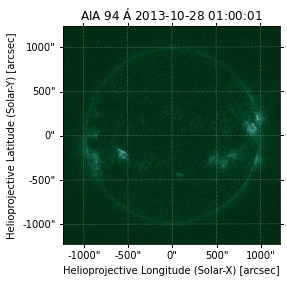

In [69]:
map_fits[0].plot()

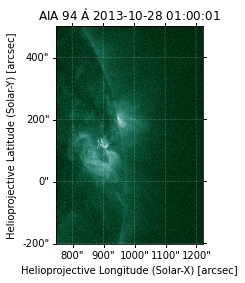

In [70]:
top_right = SkyCoord(1250*u.arcsec, 500*u.arcsec, frame=map_fits[0].coordinate_frame)
bottom_left = SkyCoord(750 * u.arcsec, -200. * u.arcsec, frame=map_fits[0].coordinate_frame)
    
flare_submap_area =  map_fits[0].submap(bottom_left, top_right=top_right)

flare_submap_area.plot()

In [71]:
submap_array = np.array([])
for index in range(len(map_fits)):
    top_right = SkyCoord(1250*u.arcsec, 500*u.arcsec, frame=map_fits[index].coordinate_frame)
    bottom_left = SkyCoord(750 * u.arcsec, -200. * u.arcsec, frame=map_fits[index].coordinate_frame)
    
    flare_submap_area =  map_fits[index].submap(bottom_left, top_right=top_right)
    submap_array = np.append(submap_array, flare_submap_area )

len(submap_array)    

9

## Making a sun video

In [72]:
fig = plt.figure(figsize=(10, 20))
fig.tight_layout(pad = 3, w_pad = 3.5, h_pad = 2.5)

def animate_sun(i):
    print('i' + str(i))
    fig.clear()
    
    #### WHOLE SUN 
    sun_map_whole = fig.add_subplot( 1 , 2, 1, projection = map_fits[i])
    map_fits[i].plot_settings['norm'] = colors.LogNorm(10, 400, True)
    map_fits[i].plot(axes = sun_map_whole)
    map_fits[i].draw_grid(axes = sun_map_whole)
    sun_map_whole.set_facecolor('black')
    
    #### FLARE REGION  
    sun_map_region = fig.add_subplot( 1 , 2, 2, projection = submap_array[i])
    submap_array[i].plot_settings['norm'] = colors.LogNorm(10, 400, True)
    submap_array[i].plot(axes = sun_map_region)
    submap_array[i].draw_grid(axes = sun_map_region)
    sun_map_region.set_facecolor('black')

<Figure size 720x1440 with 0 Axes>

i0


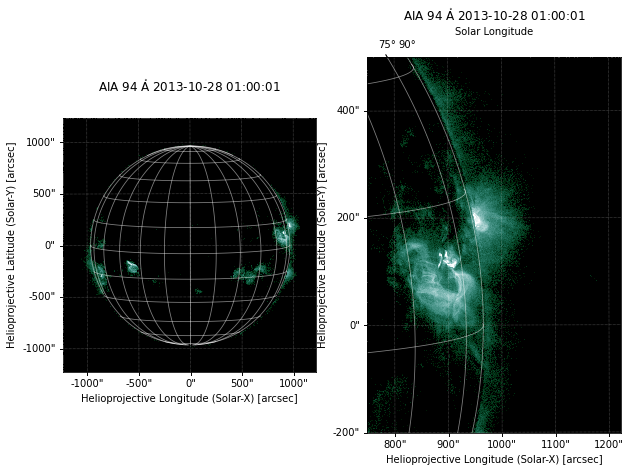

In [73]:
animate_sun(0)
fig

In [74]:
anim = animation.FuncAnimation(fig, animate_sun, frames=len(map_fits))

Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=1800)

anim.save('AIA_video_example.mp4', writer=writer)


i0
i0
i1
i2
i3
i4
i5
i6
i7
i8
